<a href="https://colab.research.google.com/github/rammya29/Goeduhub-STP/blob/main/Assignment_Task_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment / Task - 14

Practice KNN - We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not.

DataSet-Click Here for Download [user_data.csv]() 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df.Gender=le.fit_transform(df.Gender)
df.Gender.head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

In [10]:
x=df.drop(['Purchased','User ID',],axis='columns')
print(x)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [11]:
y=df['Purchased']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x.drop('Gender',axis=1,inplace=True)
x=scaler.fit_transform(x)

In [13]:
print(x)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

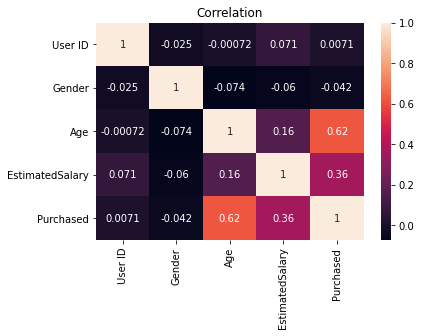

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation')
plt.show()

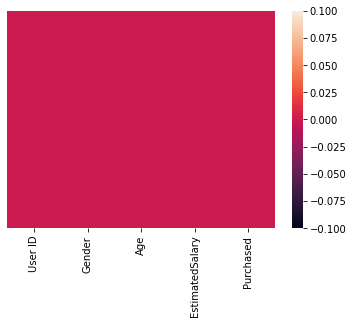

In [15]:
sns.heatmap(df.isnull(),yticklabels=False)

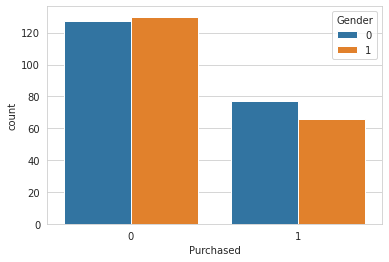

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',hue='Gender',data=df)

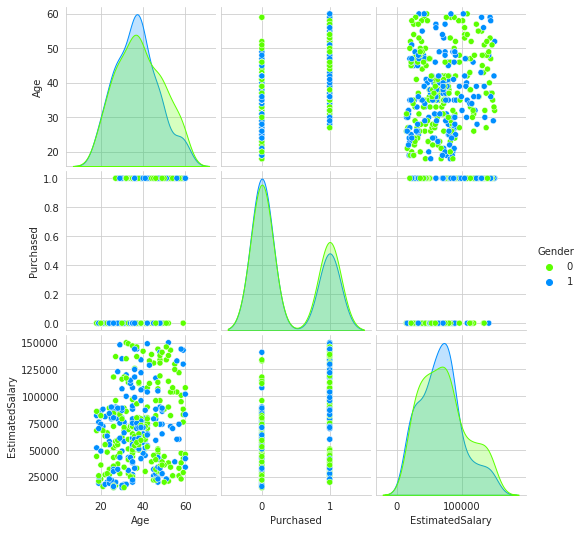

In [17]:
sns.pairplot(df,hue='Gender',vars=['Age','Purchased','EstimatedSalary'],palette='gist_rainbow')

In [18]:
max_threshold=df['Age'].quantile(0.95)
print(max_threshold)

57.049999999999955


In [19]:
min_threshold=df['Age'].quantile(0.05)
print(min_threshold)

21.0


In [20]:
df[df['Age']>max_threshold]

,User ID,Gender,Age,EstimatedSalary,Purchased
64,15605000,0,59,83000,0
204,15660866,0,58,101000,1
212,15707596,0,59,42000,0
215,15779529,0,60,108000,1
219,15732987,1,59,143000,1
223,15593715,1,60,102000,1
258,15569641,0,58,95000,1
271,15688172,0,59,76000,1
272,15791373,1,60,42000,1
280,15609669,0,59,88000,1


In [21]:
df[df['Age']>max_threshold]

,User ID,Gender,Age,EstimatedSalary,Purchased
64,15605000,0,59,83000,0
204,15660866,0,58,101000,1
212,15707596,0,59,42000,0
215,15779529,0,60,108000,1
219,15732987,1,59,143000,1
223,15593715,1,60,102000,1
258,15569641,0,58,95000,1
271,15688172,0,59,76000,1
272,15791373,1,60,42000,1
280,15609669,0,59,88000,1


In [22]:
df[df['Age']>max_threshold]

,User ID,Gender,Age,EstimatedSalary,Purchased
64,15605000,0,59,83000,0
204,15660866,0,58,101000,1
212,15707596,0,59,42000,0
215,15779529,0,60,108000,1
219,15732987,1,59,143000,1
223,15593715,1,60,102000,1
258,15569641,0,58,95000,1
271,15688172,0,59,76000,1
272,15791373,1,60,42000,1
280,15609669,0,59,88000,1


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=3) 
KNN.fit(x_train,y_train) 

y_pred = KNN.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  6],
       [ 1, 27]])

In [31]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc*100)

91.25


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



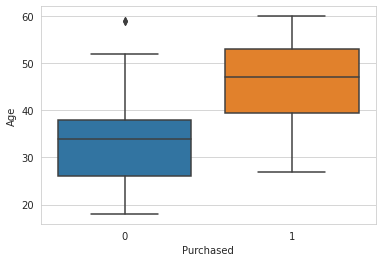

In [40]:
sns.boxplot(x='Purchased',y='Age',data=df)

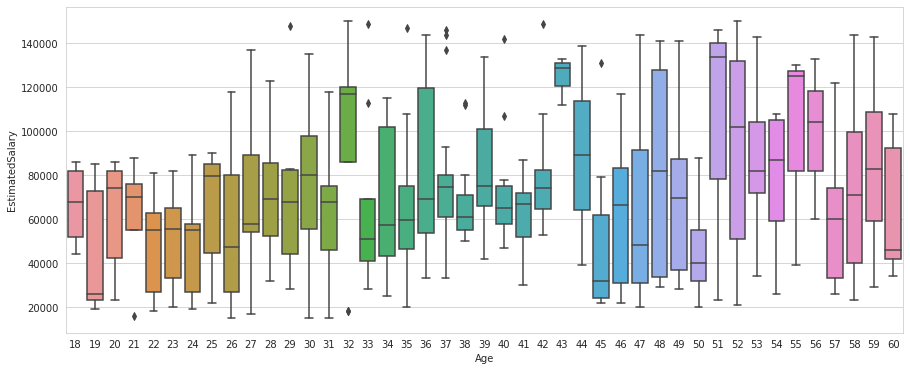

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Age',y='EstimatedSalary',data=df)

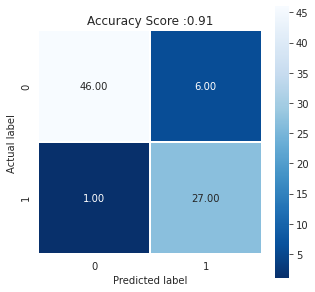

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

A=f'Accuracy Score :{acc:.2f}'

plt.title(A)
plt.show()

#End Of Assignment

**Author** : Rammya Dharshini K

**Date** : 18-06-2021

**Reg.ID** : GO_STP_1613